In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, PCA
from pyspark.ml.linalg import Vectors
from sklearn.datasets import load_iris
import pandas as pd


In [0]:
spark = SparkSession.builder.appName("PCA_Iris").getOrCreate()


In [0]:
# Load Iris data from sklearn
iris_sklearn = load_iris()
iris_df = pd.DataFrame(data=iris_sklearn.data, columns=iris_sklearn.feature_names)
iris_df['target'] = iris_sklearn.target

# Convert pandas DataFrame to Spark DataFrame
iris_spark_df = spark.createDataFrame(iris_df)

# Show the data (optional)
iris_spark_df.show()


+-----------------+----------------+-----------------+----------------+------+
|sepal length (cm)|sepal width (cm)|petal length (cm)|petal width (cm)|target|
+-----------------+----------------+-----------------+----------------+------+
|              5.1|             3.5|              1.4|             0.2|     0|
|              4.9|             3.0|              1.4|             0.2|     0|
|              4.7|             3.2|              1.3|             0.2|     0|
|              4.6|             3.1|              1.5|             0.2|     0|
|              5.0|             3.6|              1.4|             0.2|     0|
|              5.4|             3.9|              1.7|             0.4|     0|
|              4.6|             3.4|              1.4|             0.3|     0|
|              5.0|             3.4|              1.5|             0.2|     0|
|              4.4|             2.9|              1.4|             0.2|     0|
|              4.9|             3.1|              1.

In [0]:
# Assemble the features into a single vector column
assembler = VectorAssembler(inputCols=iris_sklearn.feature_names, outputCol="features")
iris_features_df = assembler.transform(iris_spark_df)

# Show the feature vector (optional)
iris_features_df.select("features").show()


+-----------------+
|         features|
+-----------------+
|[5.1,3.5,1.4,0.2]|
|[4.9,3.0,1.4,0.2]|
|[4.7,3.2,1.3,0.2]|
|[4.6,3.1,1.5,0.2]|
|[5.0,3.6,1.4,0.2]|
|[5.4,3.9,1.7,0.4]|
|[4.6,3.4,1.4,0.3]|
|[5.0,3.4,1.5,0.2]|
|[4.4,2.9,1.4,0.2]|
|[4.9,3.1,1.5,0.1]|
|[5.4,3.7,1.5,0.2]|
|[4.8,3.4,1.6,0.2]|
|[4.8,3.0,1.4,0.1]|
|[4.3,3.0,1.1,0.1]|
|[5.8,4.0,1.2,0.2]|
|[5.7,4.4,1.5,0.4]|
|[5.4,3.9,1.3,0.4]|
|[5.1,3.5,1.4,0.3]|
|[5.7,3.8,1.7,0.3]|
|[5.1,3.8,1.5,0.3]|
+-----------------+
only showing top 20 rows



In [0]:
# Initialize PCA model
pca = PCA(k=2, inputCol="features", outputCol="pcaFeatures")

# Fit the model on the feature data
pca_model = pca.fit(iris_features_df)

# Transform the data using the PCA model
iris_pca_df = pca_model.transform(iris_features_df)

# Show the PCA features (optional)
iris_pca_df.select("pcaFeatures").show()


+--------------------+
|         pcaFeatures|
+--------------------+
|[-2.8182395066394...|
|[-2.7882234453146...|
|[-2.6133745635497...|
|[-2.7570222769675...|
|[-2.7736485960544...|
|[-3.2215054997645...|
|[-2.6818273818683...|
|[-2.8762201594623...|
|[-2.6159824008284...|
|[-2.8296093347880...|
|[-2.9954180419571...|
|[-2.8896099017002...|
|[-2.7162558664209...|
|[-2.2785613887433...|
|[-2.8576147426669...|
|[-3.1163260990778...|
|[-2.8788372573845...|
|[-2.8540684263546...|
|[-3.3025448089914...|
|[-2.9143787327302...|
+--------------------+
only showing top 20 rows



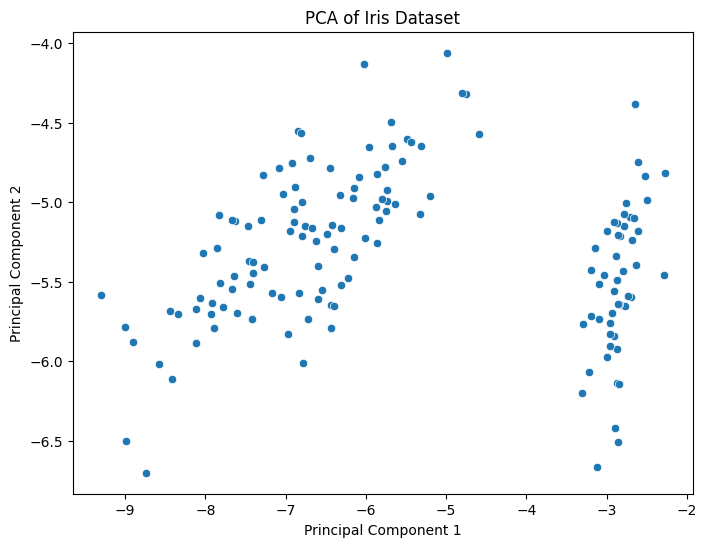

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to Pandas DataFrame
pandas_df = iris_pca_df.select("pcaFeatures").toPandas()

# Extract PCA features for plotting
pandas_df["pca1"] = pandas_df["pcaFeatures"].apply(lambda x: x[0])
pandas_df["pca2"] = pandas_df["pcaFeatures"].apply(lambda x: x[1])

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x="pca1", y="pca2", data=pandas_df, palette="viridis")
plt.title("PCA of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [0]:
spark.stop()
